In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from datetime import datetime
import itertools
from tqdm import tqdm
import torch
import geopandas as gpd

In [23]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
frontiers = gpd.read_file((gpd.datasets.get_path('naturalearth_lowres')))

/tmp/ipykernel_13760/1144883926.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
/tmp/ipykernel_13760/1144883926.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  frontiers = gpd.read_file((gpd.datasets.get_path('naturalearth_lowres')))


In [24]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [25]:
frontiers.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Figure size 100000x30000 with 0 Axes>

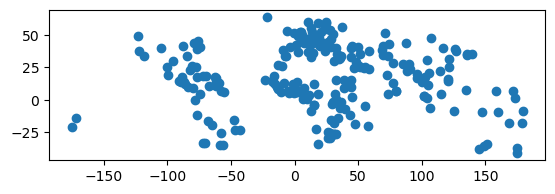

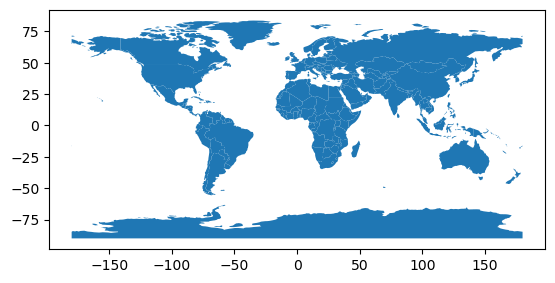

In [29]:
plt.figure(figsize=(1000,300))
cities.plot()
frontiers.plot()
plt.show()

In [30]:
df_events=pd.read_csv('ged201.csv' ,dtype={'gwnoa': object})

In [31]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225385 entries, 0 to 225384
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 225385 non-null  int64  
 1   relid              225385 non-null  object 
 2   year               225385 non-null  int64  
 3   active_year        225385 non-null  int64  
 4   code_status        225385 non-null  object 
 5   type_of_violence   225385 non-null  int64  
 6   conflict_dset_id   225385 non-null  int64  
 7   conflict_new_id    225385 non-null  int64  
 8   conflict_name      225385 non-null  object 
 9   dyad_dset_id       225385 non-null  int64  
 10  dyad_new_id        225385 non-null  int64  
 11  dyad_name          225385 non-null  object 
 12  side_a_dset_id     225385 non-null  int64  
 13  side_a_new_id      225385 non-null  int64  
 14  side_a             225385 non-null  object 
 15  side_b_dset_id     225385 non-null  int64  
 16  si

In [32]:
print(f'{len(df_events.latitude)/len (df_events)*100}%')

100.0%


In [33]:
print(f'{len(df_events.longitude)/len (df_events)*100}%')


100.0%


In [34]:
serie_noNan=df_events.isna().sum()==0

In [35]:
df_nonNan=pd.DataFrame(serie_noNan, columns=['valid'])

In [36]:
df_nonNan.index

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [37]:
df_nonNan = df_nonNan[df_nonNan.valid==True]

In [38]:
df_nonNan.index

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'where_prec', 'where_coordinates', 'latitude', 'longitude', 'geom_wkt',
       'priogrid_gid', 'country', 'country_id', 'region', 'event_clarity',
       'date_prec', 'date_start', 'date_end', 'deaths_a', 'deaths_b',
       'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low'],
      dtype='object')

In [39]:
df_dataset= df_events[df_nonNan.index]

In [40]:
df_dataset

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6,6
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6,6
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-15 00:00:00.000,1989-01-18 00:00:00.000,0,0,0,4,4,4,0
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-23 00:00:00.000,1989-01-24 00:00:00.000,0,0,0,600,600,600,600
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-30 00:00:00.000,1989-02-05 00:00:00.000,0,0,0,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225380,15525,MZM-1989-3-1347-4,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,3,1989-03-18 00:00:00.000,1989-03-24 00:00:00.000,0,0,9,0,9,9,9
225381,15524,MZM-1989-3-1347-16,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,3,1989-07-09 00:00:00.000,1989-07-15 00:00:00.000,0,0,9,0,9,9,9
225382,15245,MZM-1990-3-1347-18,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,2,1990-06-07 00:00:00.000,1990-06-10 00:00:00.000,0,0,7,0,7,7,7
225383,15516,MZM-1990-3-1347-28,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,3,1990-11-17 00:00:00.000,1990-11-23 00:00:00.000,0,0,1,0,1,1,1


In [41]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225385 entries, 0 to 225384
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 225385 non-null  int64  
 1   relid              225385 non-null  object 
 2   year               225385 non-null  int64  
 3   active_year        225385 non-null  int64  
 4   code_status        225385 non-null  object 
 5   type_of_violence   225385 non-null  int64  
 6   conflict_dset_id   225385 non-null  int64  
 7   conflict_new_id    225385 non-null  int64  
 8   conflict_name      225385 non-null  object 
 9   dyad_dset_id       225385 non-null  int64  
 10  dyad_new_id        225385 non-null  int64  
 11  dyad_name          225385 non-null  object 
 12  side_a_dset_id     225385 non-null  int64  
 13  side_a_new_id      225385 non-null  int64  
 14  side_a             225385 non-null  object 
 15  side_b_dset_id     225385 non-null  int64  
 16  si

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
plt.suptitle(f'densité des zones de conflit par état ', fontsize=16)
ax1.pie(df_dataset.country.value_counts(),labels=df_dataset.country.value_counts().index)


In [100]:
gdf.region.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Middle East'],
      dtype=object)

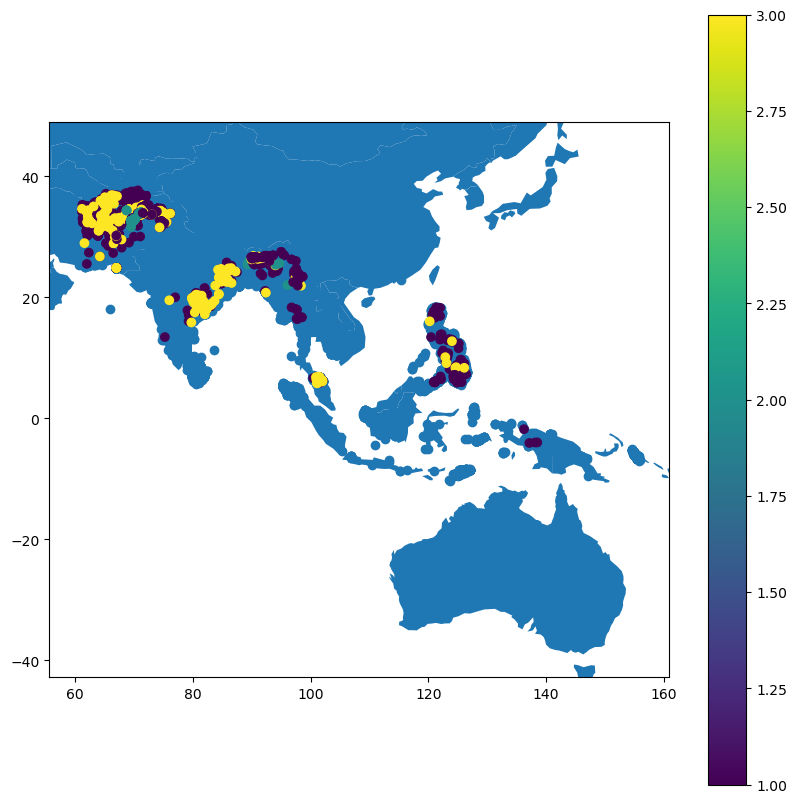

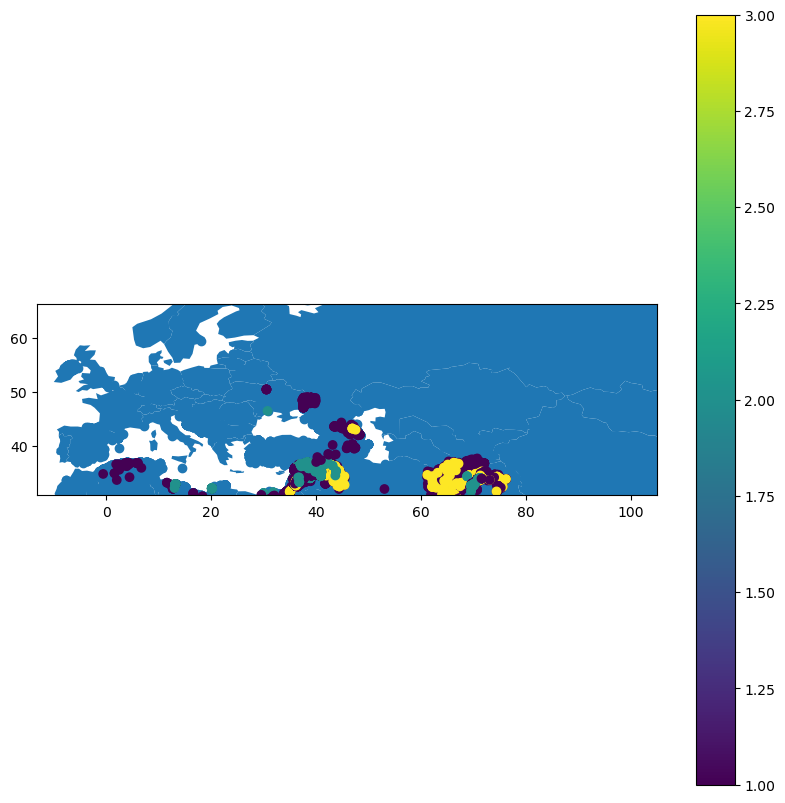

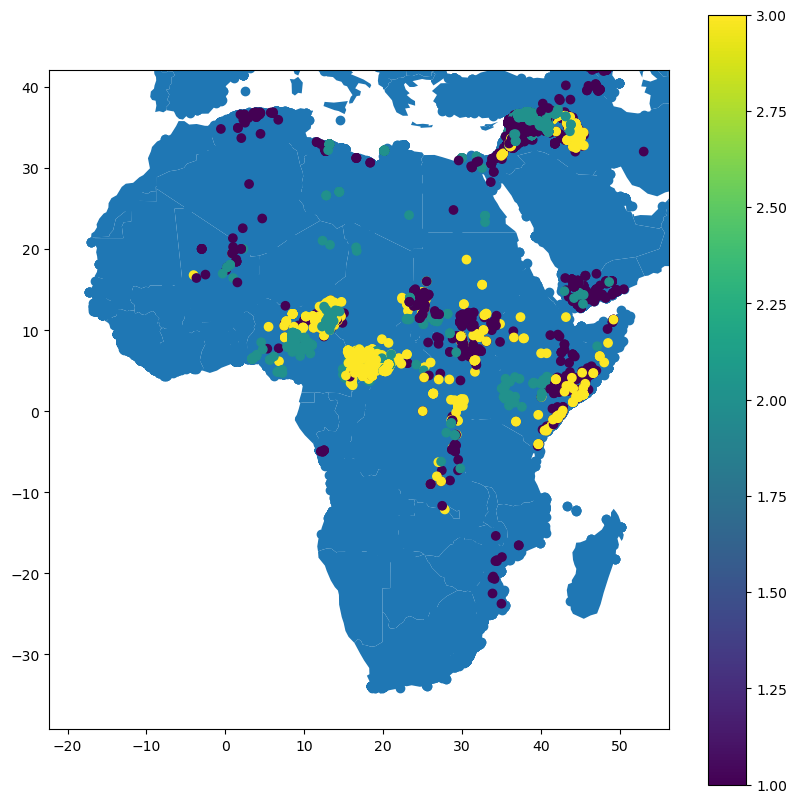

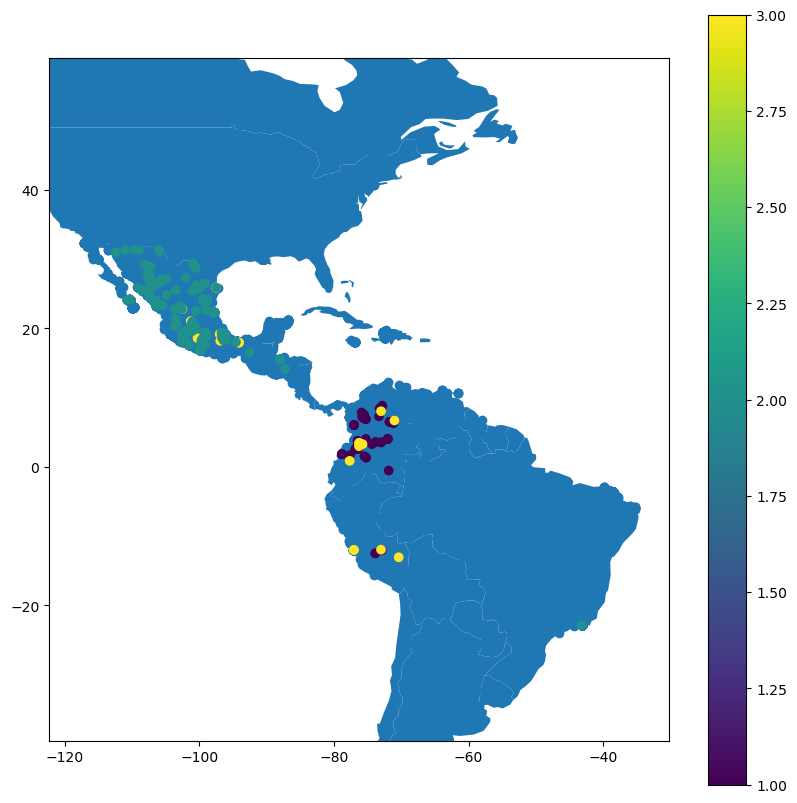

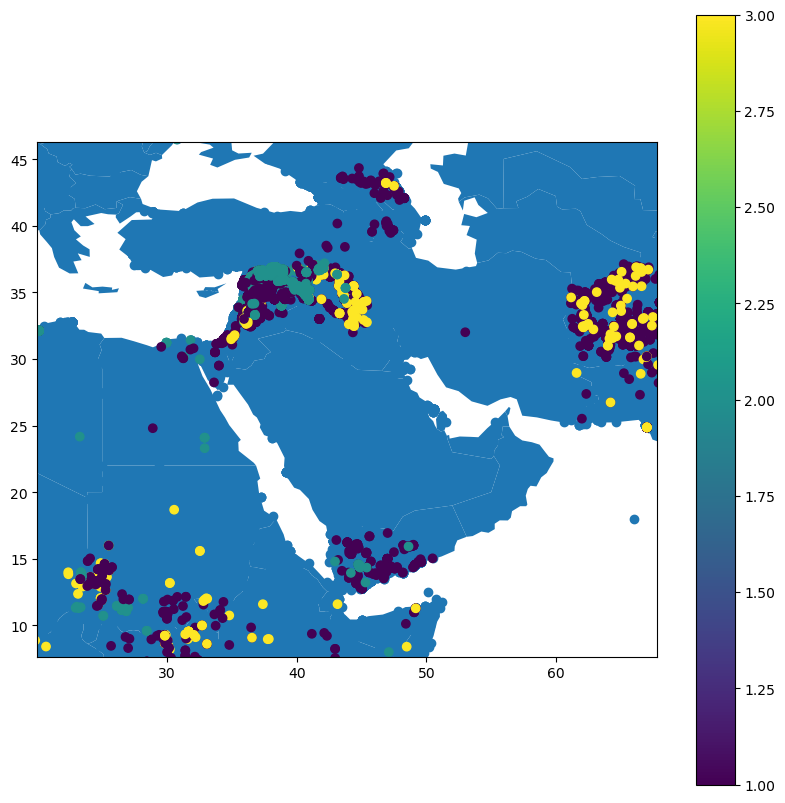

In [102]:
gdf = gpd.GeoDataFrame(
    df_dataset, geometry=gpd.points_from_xy(df_dataset.longitude, df_dataset.latitude), crs="EPSG:4326"
)
for region in gdf.region.unique():
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax)
    
    xmin, ymin, xmax, ymax = gdf[gdf.region == region].total_bounds
    pad = 5  # add a padding around the geometry
    ax.set_xlim(xmin-pad, xmax+pad)
    ax.set_ylim(ymin-pad, ymax+pad)
    # We can now plot our ``GeoDataFrame``.
    frontiers.plot(ax=ax)
    year_2014.plot(ax=ax, column="type_of_violence", legend=True) 


In [68]:
df_string=df_dataset

In [69]:
series=df_dataset.year

In [70]:
df_string.year=df_string.year.map(str)

/tmp/ipykernel_37572/233830623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.year=df_string.year.map(str)


In [71]:
df_string.year[0]

'2017'

In [72]:
df_dataset.year.value_counts().index=df_dataset.year.value_counts().index.map(str)

In [73]:
df_dataset.year.value_counts().index

Index(['2014', '2013', '2012', '2015', '2016', '2017', '2019', '2018', '2011',
       '2009', '2004', '2008', '2010', '2002', '1994', '2007', '2005', '2006',
       '2000', '2003', '1993', '1999', '1995', '1992', '1998', '2001', '1990',
       '1996', '1991', '1997', '1989'],
      dtype='object', name='year')

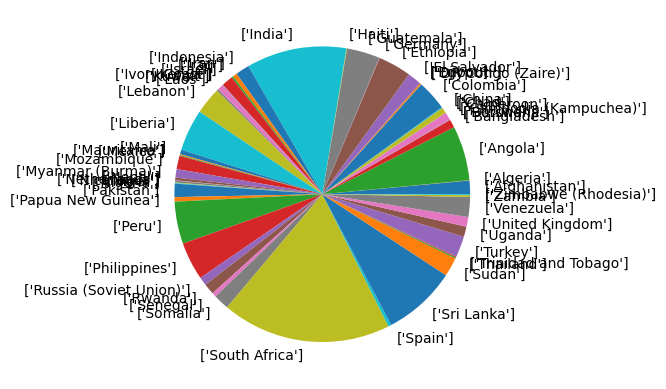

In [74]:
n_year='1990'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

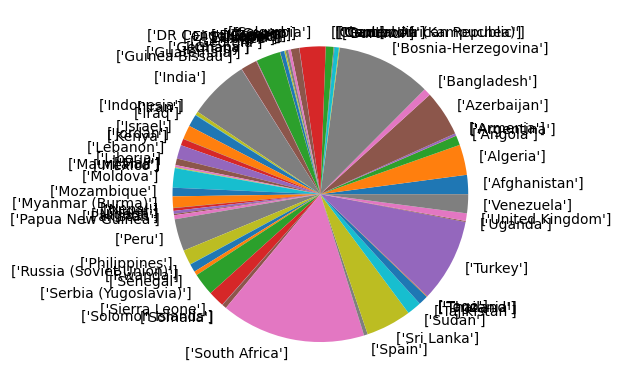

In [75]:
n_year='1992'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

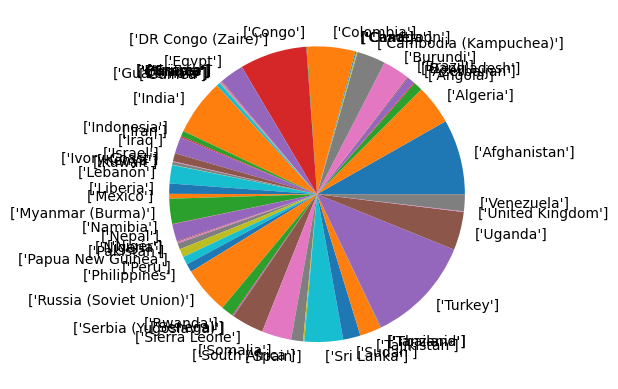

In [76]:
n_year='1996'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

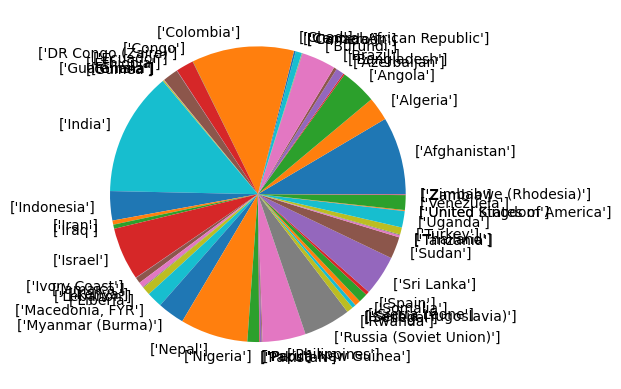

In [77]:
n_year='2001'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

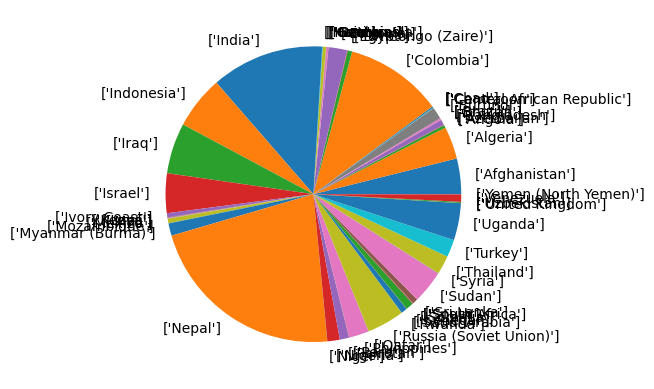

In [78]:
n_year='2004'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

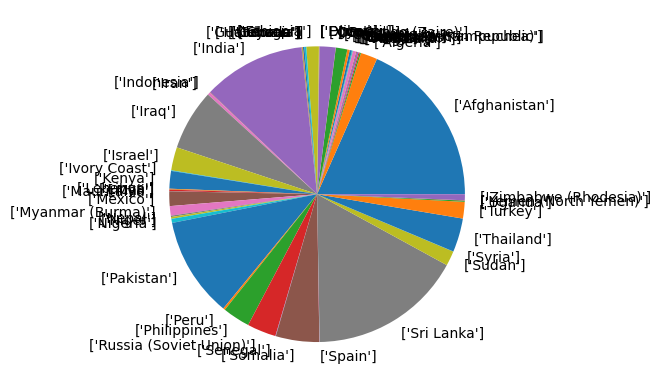

In [79]:
n_year='2008'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

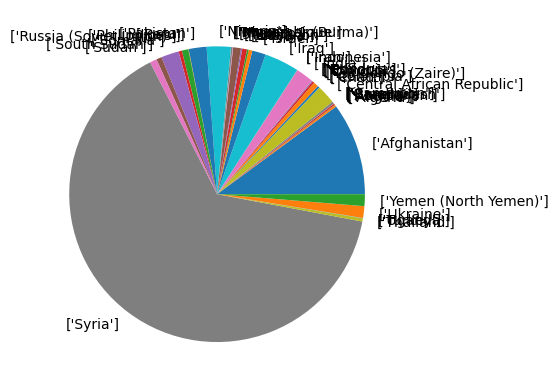

In [80]:
n_year='2014'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

In [81]:
df_dataset.describe()

,id,active_year,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,side_a_dset_id,side_a_new_id,side_b_dset_id,...,country_id,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
count,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,...,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000
mean,177959.035965,0.963494,1.421896,2045.855084,2065.118770,4925.258766,5110.042150,362.018564,362.018564,3140.517661,...,617.806691,1.084784,1.256024,2.105016,2.656854,4.360237,2.177452,11.299559,18.331890,9.493977
std,97296.005526,0.187547,0.751061,4279.466053,4186.368474,5728.788672,5703.545386,1006.456067,1006.456067,3570.076833,...,161.684809,0.278560,0.709845,63.717796,32.812313,187.360638,124.964213,239.542891,397.427596,186.459217
min,4.000000,0.000000,1.000000,6.000000,205.000000,6.000000,406.000000,3.000000,3.000000,3.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93469.000000,1.000000,1.000000,299.000000,299.000000,658.000000,735.000000,118.000000,118.000000,303.000000,...,615.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,188695.000000,1.000000,1.000000,333.000000,337.000000,792.000000,955.000000,123.000000,123.000000,743.000000,...,652.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000
75%,262299.000000,1.000000,2.000000,400.000000,506.000000,11973.000000,11973.000000,146.000000,146.000000,4456.000000,...,700.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,5.000000,6.000000,5.000000
max,336238.000000,1.000000,3.000000,16331.000000,14973.000000,16331.000000,16331.000000,7676.000000,7676.000000,9999.000000,...,940.000000,2.000000,5.000000,14776.000000,9505.000000,40000.000000,48183.000000,48183.000000,75000.000000,48183.000000


In [238]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225385 entries, 0 to 225384
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 225385 non-null  int64  
 1   relid              225385 non-null  object 
 2   year               225385 non-null  object 
 3   active_year        225385 non-null  int64  
 4   code_status        225385 non-null  object 
 5   type_of_violence   225385 non-null  int64  
 6   conflict_dset_id   225385 non-null  int64  
 7   conflict_new_id    225385 non-null  int64  
 8   conflict_name      225385 non-null  object 
 9   dyad_dset_id       225385 non-null  int64  
 10  dyad_new_id        225385 non-null  int64  
 11  dyad_name          225385 non-null  object 
 12  side_a_dset_id     225385 non-null  int64  
 13  side_a_new_id      225385 non-null  int64  
 14  side_a             225385 non-null  object 
 15  side_b_dset_id     225385 non-null  int64  
 16  si

In [242]:
df_dataset.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6,6
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6,6
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-15 00:00:00.000,1989-01-18 00:00:00.000,0,0,0,4,4,4,0
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-23 00:00:00.000,1989-01-24 00:00:00.000,0,0,0,600,600,600,600
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-30 00:00:00.000,1989-02-05 00:00:00.000,0,0,0,2,2,2,0


# ZONE d'EXPLOITATION DU DATASET
- une frappe pour un couple latitude longitude
- intensité du conflit nombre de décès
- intensité de la frappe de faible à forte
- suivre  le dataset en time series
- predire la probabilité d'une frappe et de son intensité sur quelle latitude longitude dans un laps de temps donné.


# Zone de reflexion sur le model
- Graphe de connexion 
- noeud A tuple (start end) avec features ne définissant pas les résultantes de l'attaques
- noeud B tuple (longitude latitude) avec features définissant les résultantes de l'attaque
- lien edge entre A et B
- layers d'attention (GATConv ou GAT2vConv ou GraphSAGE)
- layers GCN? 2?
- definir un nombre fini des cinq (ou dix mais definis) prochaines attaques quand? quelles ? intensité?
- la définition se fera sur la plus grande probabilité parmi les prédicition
- metriques ROC AUC pour la fiabilité.

#  Zone de reflexion sur un graphe
- regression linéaire
- autant de edgess qu'il y a de lignes
- il n'y a "que" 11312 date de debut d'events sur 225385 enregistrements
- on anticipe un graphe à 11312 edges

In [31]:
df_dataset['date_start'].describe()

count                      225385
unique                      11312
top       1994-04-07 00:00:00.000
freq                          161
Name: date_start, dtype: object

In [52]:
G = nx.Graph()
for node_tuple in [df_dataset.date_start,df_dataset.longitude, df_dataset.latitude, df_dataset.type_of_violence]:
    G.add_edges_from(itertools.product(node_tuple, node_tuple))

KeyboardInterrupt: 

In [ ]:
nx.drawing(G[0])

In [ ]:
nx.drawing(G)